## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

f1 = "Resources/Mouse_metadata.csv"
f2 = "Resources/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(f1)
study_results = pd.read_csv(f2)


# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results)
combined_data.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Display the data table for preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Display the data table for preview
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Checking the number of mice.
numMice = len(mouse_metadata['Mouse ID'])
numMice


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#combined_data.duplicated('Mouse ID')
dupeMice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
dupeMice


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
#dataDupeMice = pd.DataFrame(dupeMice)
#dataDupeMice.loc['g989']
dupeMouseData = combined_data[combined_data['Mouse ID'].isin(dupeMice)==True]
dupeMouseData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#noDupeID = combined_data.drop_duplicates(['Mouse ID'])
noDupeID = combined_data[combined_data['Mouse ID'].isin(dupeMice)==False]
noDupeID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
trueMiceData = noDupeID["Mouse ID"].value_counts()
trueMiceData


p136    10
e584    10
y163    10
c559    10
g288    10
        ..
n482     1
u153     1
d133     1
x336     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regiMean = noDupeID.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
regiMean

regiMedian = noDupeID.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
regiMedian

regiVar = noDupeID.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
regiVar

regiSTD = noDupeID.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
regiSTD

regiSEM = noDupeID.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
regiSEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summStatsTab = pd.DataFrame({'Mean': regiMean, 'Media': regiMedian, 'Variance': regiVar, 'Standard Deviation': regiSTD, 'SEM': regiSEM})
summStatsTab.head()

,Mean,Media,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
drugRegi = noDupeID.groupby('Drug Regimen')
summStatsTab2 = drugRegi.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summStatsTab2.head()


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

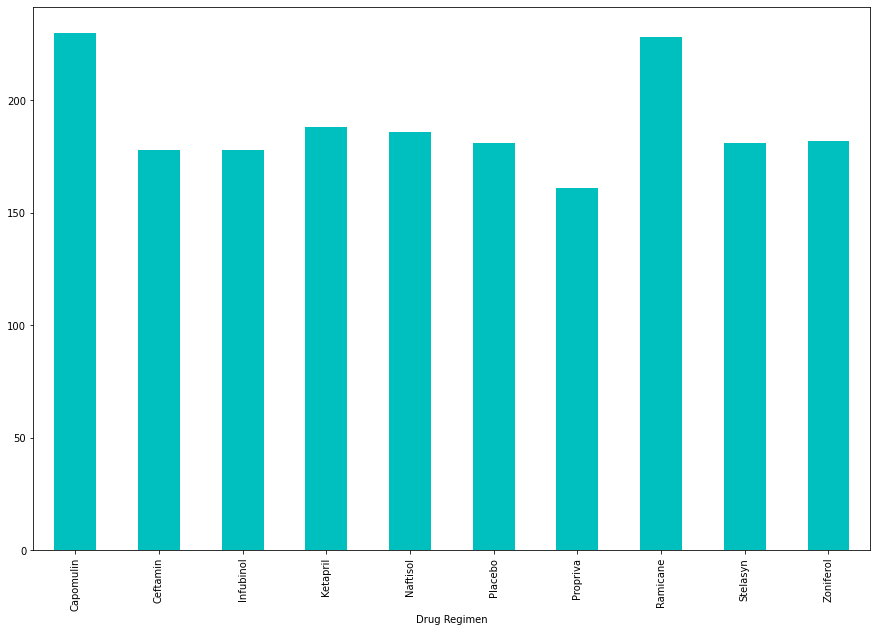

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint = combined_data.groupby('Timepoint')
timepoint.head()

drugRegimen = combined_data.groupby('Drug Regimen').count()['Timepoint']
drugRegimen.head()

drugRegimen.plot(kind = 'bar', figsize = (15,10), color ='c')
drugRegimen

#combined_data = pd.DataFrame({'Drug Regimen': ['Capomulin', 'Ceftamine', 'Infubinol', 'Ketaphil', 'Naftisol', 'Placebo', 'Propiva', 'Ramicane', 'Stelasyn', 'Zoniferol'], 'Timepoint': []})

Text(0.5, 1.0, 'Total Number of Timepoints for all Mice on each Drug Regimen')

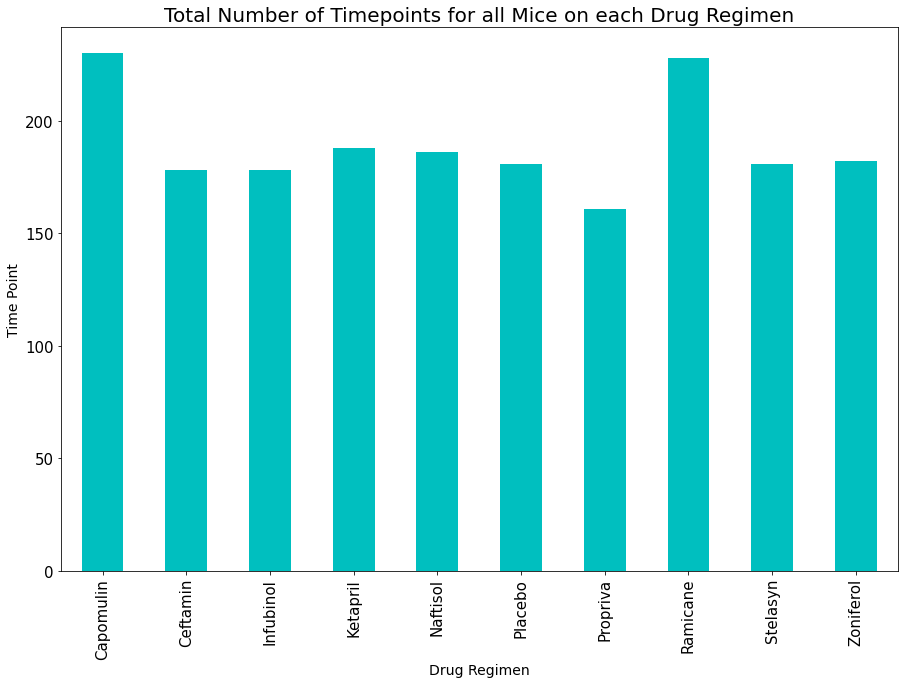

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

pyplotBar = combined_data.groupby(['Drug Regimen']).count()['Timepoint']
pyplotBar

barplotPD = pyplotBar.plot.bar(figsize=(15,10), color='c', fontsize = 15)
pyplotBar
plt.ylabel('Time Point', fontsize = 14)
plt.xlabel('Drug Regimen', fontsize =14)
plt.title('Total Number of Timepoints for all Mice on each Drug Regimen', fontsize = 20)

<AxesSubplot:ylabel='Mouse ID'>

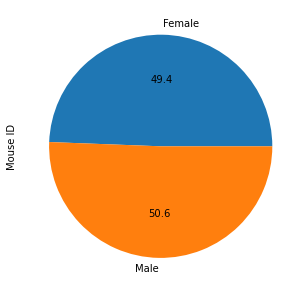

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

piePlot = combined_data.groupby(['Sex']).count()['Mouse ID']
piePlot

piePlot.plot( kind = 'pie', figsize = (5,10), autopct='%.1f')



ValueError: x must be 1D

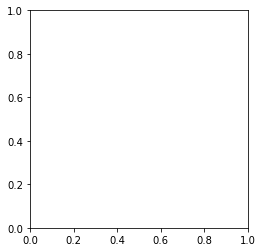

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genderCT = combined_data.groupby(['Sex']).count()
genderCT

plt.pie(genderCT, labels=genders, autopct='%.1f')
plt.show()



## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

fourDrugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
maxTP = combined_data['Drug Regimen'].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxTimePoint = combined_data[combined_data['Drug Regimen'].isin(fourDrugs)]
maxTimePoint.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [51]:
# Put treatments into a list for for loop (and later for plot labels)

fourDrugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumorVolData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in fourDrugs:


     # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = maxTimePoint.loc[maxTimePoint['Drug Regimen'] ==x, 'Tumor Volume (mm3)']
    
    # add subset 
    tumorVolData.append(tumorVol)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumorVol.quantile([.25, .5, .75])
    lowerQt = quartiles[0.25]
    upperQt = quartiles [0.75]
    iqr = upperQt - lowerQt
    lowerB = lowerQt - (1.5 * iqr)
    upperB = upperQt + (1.5 * iqr)
    
    outliers0 = tumorVol.loc[(tumorVol < lowerB)]
    outliers1 = tumorVol.loc[(tumorVol > upperB)]
    print(f"{x}'s potential outliers: {outliers0}")
    print(f"{x}'s potential outliers: {outliers1}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


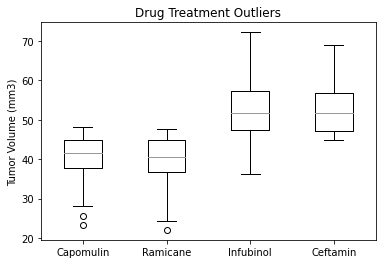

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumorVolData, labels = fourDrugs)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Drug Treatment Outliers')
plt.show()



## Line and Scatter Plots

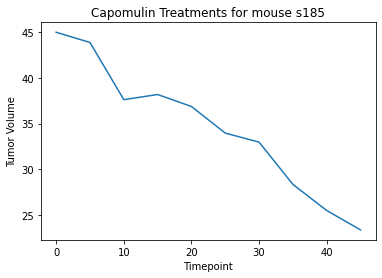

In [60]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
capomulin 

s185 = capomulin.loc[capomulin['Mouse ID'] == 's185']
s185

plt.plot(s185['Timepoint'], s185['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin Treatments for mouse s185')
plt.show()

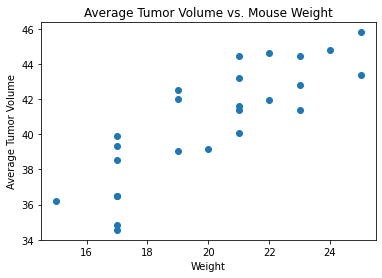

In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avgTumor = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(avgTumor['Weight (g)'],avgTumor['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
